### 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

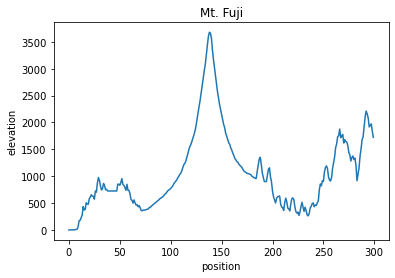

In [35]:
from matplotlib import pyplot as plt
import numpy as np

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

#位置、標高をまとめたndarrayをfuji_xyとする。
position = fuji[:,0]
elevation = fuji[:,3]
fuji_xy = np.concatenate((position[:, np.newaxis], elevation[:, np.newaxis] ), axis=1)

plt.plot(fuji_xy[:,0], fuji_xy[:,1])
plt.xlabel("position")
plt.ylabel("elevation")
plt.title("Mt. Fuji")
plt.show()

### 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。
「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。
勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

In [111]:
from matplotlib import pyplot as plt
import numpy as np

#compute_grad(): 現在地の勾配を計算する。
def compute_grad(fuji_xy, current_position):
    current_grad = (fuji_xy[current_position,1] - fuji_xy[current_position -1,1]) / (fuji_xy[current_position,0] - fuji_xy[current_position -1,0])
    return current_grad

#CSVデータの読み込み
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

#位置、標高をまとめたndarrayをfuji_xyとする。
position = fuji[:,0]
elevation = fuji[:,3]
fuji_xy = np.concatenate((position[:, np.newaxis], elevation[:, np.newaxis] ), axis=1)

#現在の位置を表す変数を：current_positionとする。
current_position = 100
current_grad = compute_grad(fuji_xy, current_position)
print("現在の位置の勾配：", current_grad)

現在の位置の勾配： 18.90000000000009


### 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。
数式で表すと 「移動先の地点 = 今いる地点 - $\alpha$ ×今いる地点の勾配」 となります。
「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。$\alpha$ は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。
《実装上の注意》
上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。
《ハイパーパラメータとは》
機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

In [112]:
from matplotlib import pyplot as plt
import numpy as np

#compute_grad(): 現在地の勾配を計算する。
def compute_grad(fuji_xy, current_position):
    current_grad = (fuji_xy[current_position,1] - fuji_xy[current_position -1,1]) / (fuji_xy[current_position,0] - fuji_xy[current_position -1,0])
    return current_grad

#compute_next_position(): 移動先地点を計算する。
def compute_next_position(current_position, current_grad, alpha):
    next_position = current_position - alpha * current_grad
    if (next_position > 0) & (next_position < 300):
        return int(next_position)
    else:
        #print("エラー：移動先地点が0〜299の範囲外となります。下山を中止します。")
        #検証用のprint 通常時はコメントとしておく。
        return current_position

#CSVデータの読み込み
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

#位置、標高をまとめたndarrayをfuji_xyとする。
position = fuji[:,0]
elevation = fuji[:,3]
fuji_xy = np.concatenate((position[:, np.newaxis], elevation[:, np.newaxis] ), axis=1)

#現在の位置を表す変数を：current_positionとする。
current_position = 100
current_grad = compute_grad(fuji_xy, current_position)

#移動先地点(変数:next_position)の計算
alpha = 0.2
next_position = compute_next_position(current_position, current_grad, alpha)

### 【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。
《実装上の注意》
問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [113]:
from matplotlib import pyplot as plt
import numpy as np

#compute_grad(): 現在地の勾配を計算する。
def compute_grad(fuji_xy, current_position):
    current_grad = (fuji_xy[current_position,1] - fuji_xy[current_position -1,1]) / (fuji_xy[current_position,0] - fuji_xy[current_position -1,0])
    return current_grad

#compute_next_position(): 移動先地点を計算する。
def compute_next_position(current_position, current_grad, alpha):
    next_position = current_position - alpha * current_grad
    if (next_position > 0) & (next_position < 300):
        return int(next_position)
    else:
        #print("エラー：移動先地点が0〜299の範囲外となります。下山を中止します。")
        #検証用のprint 通常時はコメントとしておく。
        return current_position

#compute_next_position():下山ルートを計算する。
def compute_descending_route(fuji_xy, current_position, alpha):
    
    #下山するルートを保存するリストをdescending_routeとする。
    descending_route = [current_position,]
    while True:
        current_grad = compute_grad(fuji_xy, current_position)
        next_position = compute_next_position(current_position, current_grad, alpha)

        #移動先地点(next_position)が下山ルートを保存するリスト(descending_route)に
        #含まれている場合、下山完了したと判断する。
        if next_position in descending_route:
            return descending_route
        else:
            descending_route.append(next_position)
            current_position = next_position

#CSVデータの読み込み
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

#位置、標高をまとめたndarrayをfuji_xyとする。
position = fuji[:,0]
elevation = fuji[:,3]
fuji_xy = np.concatenate((position[:, np.newaxis], elevation[:, np.newaxis] ), axis=1)

#現在の位置を表す変数を：current_positionとする。
current_position = 136

#下山ルートの表示
alpha = 0.2
print("下山ルートの表示: ", compute_descending_route(fuji_xy, current_position, alpha))

下山ルートの表示:  [136, 102, 97, 91, 88, 84, 80, 79, 73, 70, 78, 77, 75, 74]


### 【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。
《可視化例》
断面図の中に移動した地点を点で表示する
繰り返し毎の標高や勾配を折れ線グラフにする

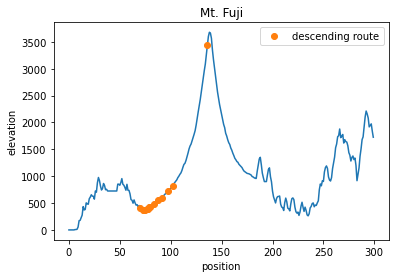

In [85]:
from matplotlib import pyplot as plt
import numpy as np

#compute_grad(): 現在地の勾配を計算する。
def compute_grad(fuji_xy, current_position):
    current_grad = (fuji_xy[current_position,1] - fuji_xy[current_position -1,1]) / (fuji_xy[current_position,0] - fuji_xy[current_position -1,0])
    return current_grad

#compute_next_position(): 移動先地点を計算する。
def compute_next_position(current_position, current_grad, alpha):
    next_position = current_position - alpha * current_grad
    if (next_position >= 0) & (next_position < 300):
        return int(next_position)
    else:
        #print("エラー：移動先地点が0〜299の範囲外となります。下山を中止します。")
        #検証用のprint 通常時はコメントとしておく。
        return current_position

#compute_next_position():下山ルートを計算する。
def compute_descending_route(fuji_xy, current_position, alpha):
    
    #下山するルートを保存するリストをdescending_routeとする。
    descending_route = [current_position,]
    while True:
        current_grad = compute_grad(fuji_xy, current_position)
        next_position = compute_next_position(current_position, current_grad, alpha)

        #移動先地点(next_position)が下山ルートを保存するリスト(descending_route)に
        #含まれている場合、下山完了したと判断することとする。
        if next_position in descending_route:
            return descending_route
        else:
            descending_route.append(next_position)
            current_position = next_position

#CSVデータの読み込み
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

#位置、標高をまとめたndarrayをfuji_xyとする。
position = fuji[:,0]
elevation = fuji[:,3]
fuji_xy = np.concatenate((position[:, np.newaxis], elevation[:, np.newaxis] ), axis=1)

#現在の位置を表す変数を：current_positionとする。
current_position = 136

#下山ルートの計算
alpha = 0.2
descending_route = compute_descending_route(fuji_xy, current_position, alpha)

#富士山断面図の描画
plt.plot(fuji_xy[:,0], fuji_xy[:,1])
plt.xlabel("position")
plt.ylabel("elevation")
plt.title("Mt. Fuji")

#下山ルートの位置とそのときの標高を保存する配列：array_routeを作成する。
array_route = np.array(descending_route)
array_route_elev = np.zeros(len(descending_route))
array_route = np.concatenate((array_route[:, np.newaxis], array_route_elev[:, np.newaxis]), axis=1)
for i, route_num in enumerate(descending_route):
    array_route[i][1] = fuji_xy[route_num][1] 

#富士山断面図に下山ルートを追加プロットする。
plt.plot(array_route[:,0], array_route[:,1], marker="o", linestyle='None', label="descending route")
plt.legend()
plt.show()


### 【問題6】初期値の変更
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。
《初期値とは》
今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。

計算した初期値の個数： 300


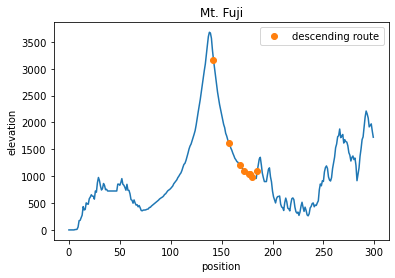

In [110]:
from matplotlib import pyplot as plt
import numpy as np

#compute_grad(): 現在地の勾配を計算する。
def compute_grad(fuji_xy, current_position):
    current_grad = (fuji_xy[current_position,1] - fuji_xy[current_position -1,1]) / (fuji_xy[current_position,0] - fuji_xy[current_position -1,0])
    return current_grad

#compute_next_position(): 移動先地点を計算する。
def compute_next_position(current_position, current_grad, alpha):
    next_position = current_position - alpha * current_grad
    if (next_position >= 0) & (next_position < 300):
        return int(next_position)
    else:
        #print("エラー：移動先地点が0〜299の範囲外となります。下山を中止します。")
        #検証用のprint 通常時はコメントとしておく。
        return current_position

#compute_next_position():下山ルートを計算する。
def compute_descending_route(fuji_xy, current_position, alpha):
    
    #下山するルートを保存するリストをdescending_routeとする。
    descending_route = [current_position,]
    while True:
        current_grad = compute_grad(fuji_xy, current_position)
        next_position = compute_next_position(current_position, current_grad, alpha)

        #移動先地点(next_position)が下山ルートを保存するリスト(descending_route)に
        #含まれている場合、下山完了したと判断することとする。
        if next_position in descending_route:
            return descending_route
        else:
            descending_route.append(next_position)
            current_position = next_position

#CSVデータの読み込み
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

#位置、標高をまとめたndarrayをfuji_xyとする。
position = fuji[:,0]
elevation = fuji[:,3]
fuji_xy = np.concatenate((position[:, np.newaxis], elevation[:, np.newaxis] ), axis=1)

#現在の位置を表す変数を：current_positionとする。
current_position = 10

#下山ルートの計算
alpha = 0.2

#全パターンの初期値について下山ルートを計算する。
#計算結果はdescending_route_listに格納する。
descending_route_list = []
for current_position in range(0, 300):
    descending_route = compute_descending_route(fuji_xy, current_position, alpha)
    descending_route_list.append(descending_route)
print("計算した初期値の個数：", len(descending_route_list))

#グラフ描画用に表示したい初期値にて再計算。
current_position = 142
descending_route = compute_descending_route(fuji_xy, current_position, alpha)

#富士山断面図の描画
plt.plot(fuji_xy[:,0], fuji_xy[:,1])
plt.xlabel("position")
plt.ylabel("elevation")
plt.title("Mt. Fuji")

#下山ルートの位置とそのときの標高を保存する配列：array_routeを作成する。
array_route = np.array(descending_route)
array_route_elev = np.zeros(len(descending_route))
array_route = np.concatenate((array_route[:, np.newaxis], array_route_elev[:, np.newaxis]), axis=1)
for i, route_num in enumerate(descending_route):
    array_route[i][1] = fuji_xy[route_num][1] 
    
#富士山断面図に下山ルートを追加プロットする。
plt.plot(array_route[:,0], array_route[:,1], marker="o", linestyle='None', label="descending route")
plt.legend()
plt.show()


初期値を136 → 142へと変更したグラフ。下山ルートが頂上左側から右側へと変更されたことが確認できる。

### 【問題7】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータ $\alpha$ を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

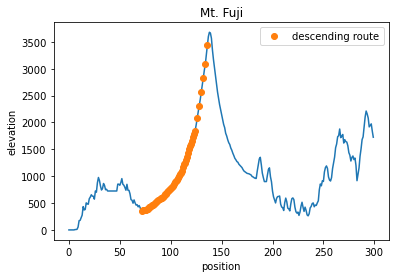

In [82]:
from matplotlib import pyplot as plt
import numpy as np

#compute_grad(): 現在地の勾配を計算する。
def compute_grad(fuji_xy, current_position):
    current_grad = (fuji_xy[current_position,1] - fuji_xy[current_position -1,1]) / (fuji_xy[current_position,0] - fuji_xy[current_position -1,0])
    return current_grad

#compute_next_position(): 移動先地点を計算する。
def compute_next_position(current_position, current_grad, alpha):
    next_position = current_position - alpha * current_grad
    if (next_position > 0) & (next_position < 301):
        return int(next_position)
    else:
        print("エラー：移動先地点が0〜３００の範囲外となります。下山を中止します。")
        return current_position

#compute_next_position():下山ルートを計算する。
def compute_descending_route(fuji_xy, current_position, alpha):
    
    #下山するルートを保存するリストをdescending_routeとする。
    descending_route = [current_position,]
    while True:
        current_grad = compute_grad(fuji_xy, current_position)
        next_position = compute_next_position(current_position, current_grad, alpha)

        #移動先地点(next_position)が下山ルートを保存するリスト(descending_route)に
        #含まれている場合、下山完了したと判断することとする。
        if next_position in descending_route:
            return descending_route
        else:
            descending_route.append(next_position)
            current_position = next_position

#CSVデータの読み込み
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

#位置、標高をまとめたndarrayをfuji_xyとする。
position = fuji[:,0]
elevation = fuji[:,3]
fuji_xy = np.concatenate((position[:, np.newaxis], elevation[:, np.newaxis] ), axis=1)

#現在の位置を表す変数を：current_positionとする。
current_position = 136

#下山ルートの計算
alpha = 0.01
descending_route = compute_descending_route(fuji_xy, current_position, alpha)

#富士山断面図の描画
plt.plot(fuji_xy[:,0], fuji_xy[:,1])
plt.xlabel("position")
plt.ylabel("elevation")
plt.title("Mt. Fuji")

#下山ルートの位置とそのときの標高を保存する配列：array_routeを作成する。
array_route = np.array(descending_route)
array_route_elev = np.zeros(len(descending_route))
array_route = np.concatenate((array_route[:, np.newaxis], array_route_elev[:, np.newaxis]), axis=1)
for i, route_num in enumerate(descending_route):
    array_route[i][1] = fuji_xy[route_num][1] 

#富士山断面図に下山ルートを追加プロットする。
plt.plot(array_route[:,0], array_route[:,1], marker="o", linestyle='None', label="descending route")
plt.legend()
plt.show()


ハイパーパラメータ $\alpha$ を0.2→0.01へ変更。下山ルートの現在地の刻みが細かくなったことが確認できる。